In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
dataset=pd.read_csv('/content/car data.csv')

In [5]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
dataset.shape

(301, 9)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#ML MODEL CANNOT UNDERSTAND NUMERICAL VALUES SO WE NEED TO CONVERT
#TEXTUAL/CATEGORICAL VALUES TO NUMERICAL VALUES.

In [11]:
#ENCODING THE CATEGORICAL DATA

In [12]:
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
#Car_Name is removed as it is of no use.
Y=dataset['Selling_Price']

In [15]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
#model training

In [18]:
#LINEAR REGRESSION

In [19]:
lin_reg=LinearRegression()

In [20]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [21]:
#MODEL EVALUATION

In [22]:
training_data_prediction=lin_reg.predict(X_train)

In [23]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R SQUARED ERROR: ",error_score)

R SQUARED ERROR:  0.8838169193709796


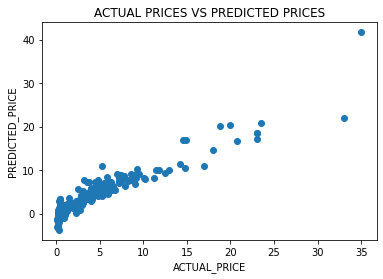

In [24]:
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

In [25]:
#FROM ABOVE GRAPH WE SEE THAT MOST OF THE VALUES ARE CLOSER TO EACH OTHER.
#AS PRICE INCREASES THE DISTANCE OR GAP BETWEEN POINTS INCREASE.

In [26]:
#PREDICTION FOR TEST_DATA
test_data_prediction=lin_reg.predict(X_test)

In [27]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R SQUARED ERROR: ",error_score)

R SQUARED ERROR:  0.8401532365377697


In [28]:
#AS R^2 VALUE IS LESS IN THIS CASE HENCE MODEL PERFORMANCE IS GOOD.

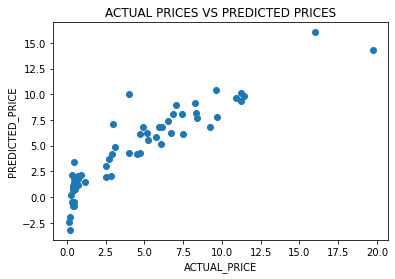

In [29]:
#FOR TEST DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

In [30]:
#HERE ALSO THERE IS NOT MUCH DISTANCE BETWEEN POINTS.

In [31]:
#LASSO REGRESSION
#LINEAR REGRESSION WORKS WELL ON THE CASES WHICH ARE LINEARLY CORRELATED OR 
#POSITIVELY CORRELATED.
#IN OTHER CASES OTHER TYPES OF REGRESSIONS SUCH AS LASSO REGRESSION, XGBOOST REGRESSOR
#ETC WORK WELL.

In [32]:
lasso_reg=Lasso()

In [33]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [34]:
#PREDICTION ON TRAINING DATA
training_data_prediction=lasso_reg.predict(X_train)

In [35]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R SQUARED ERROR: ',error_score)

R SQUARED ERROR:  0.843587395258283


In [36]:
#PREDICTION ON TEST DATA
test_data_prediction=lasso_reg.predict(X_test)

In [37]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R SQUARED ERROR: ',error_score)

R SQUARED ERROR:  0.8497457570738539


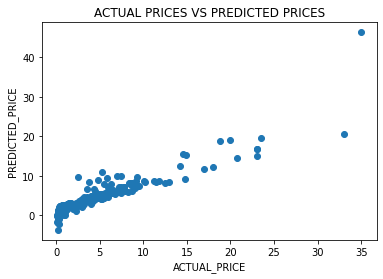

In [38]:
#FOR TRAINING DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

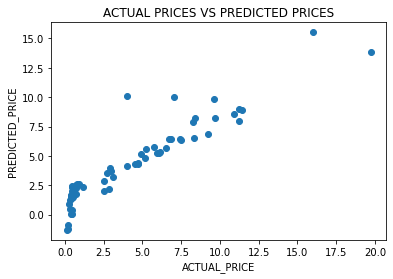

In [39]:
#FOR TEST DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()